In [1]:
pip install seaborn matplotlib gradio ollama pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
df=pd.read_csv(r"C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\Titanic-Dataset.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(f"Missing values {df.isnull().sum()}")

Missing values PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


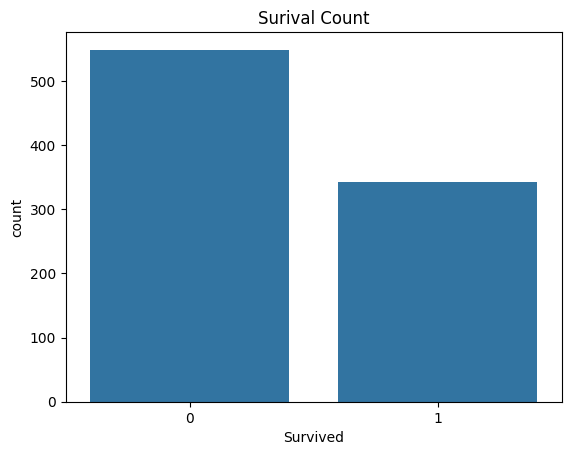

In [ ]:
sns.countplot(x='Survived',data=df)
plt.title('Surival Count')
plt.show()


In [ ]:
import ollama
def generate_insight(df_summary):
    prompt=f"Analyze the dataset summary and provide insights:\n\n{df}"
    response=ollama.chat(model="mistral",messages=[{"role":"user","content":prompt}])
    # return response['message']['content']
    return response['content']

summary=df.describe().to_string()
insights=generate_insight(summary)
print(f"AI-Generated Insights {insights}")

In [ ]:
import gradio as gr

def eda_analysis(file):
    df=pd.read_csv(file.name)
    summary=df.describe().to_string()
    insights=generate_insight(summary)
    return insights

demo=gr.Interface(fn=eda_analysis,inputs="file",outputs="text",title="AI-Powered EDA with Mistral")

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [ ]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ollama

# Function to Perform EDA and Generate Visualizations
def eda_analysis(file_path):
    df = pd.read_csv(file_path)
   
    # Fill missing values with median for numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)
   
    # Fill missing values with mode for categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
   
    # Data Summary
    summary = df.describe(include='all').to_string()
   
    # Missing Values
    missing_values = df.isnull().sum().to_string()

    # Generate AI Insights
    insights = generate_ai_insights(summary)
   
    # Generate Data Visualizations
    plot_paths = generate_visualizations(df)
   
    return f"\n Data Loaded Successfully!\n\n Summary:\n{summary}\n\n Missing Values:\n{missing_values}\n\n AI Insights:\n{insights}", plot_paths

# AI-Powered Insights using Mistral-7B (Ollama)
def generate_ai_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Function to Generate Data Visualizations
def generate_visualizations(df):
    plot_paths = []
   
    # Histograms for Numeric Columns
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
        path = f"{col}_distribution.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()
   
    # Correlation Heatmap (only numeric columns)
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8,5))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        path = "correlation_heatmap.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    return plot_paths

# Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visualizations")],
    title="📊 LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload any dataset CSV file and get automated EDA insights with AI-powered analysis and visualizations."
)

# Launch the Gradio App
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\Users\a864911\AppData\Local\Temp\ipykernel_12524\1301349539.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\a864911\AppData\Local\Temp\ipykernel_12524\1301349539.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For